In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Flight_Booking[1].csv")
df.drop(columns = ['Unnamed: 0'],inplace = True)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
df.shape

(300153, 11)

In [6]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


# Data visualization

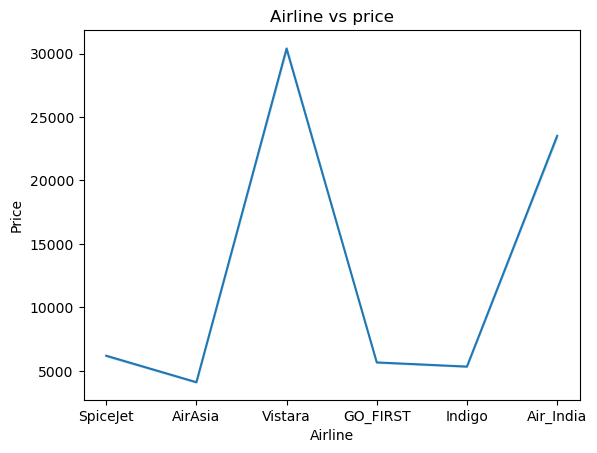

In [10]:
sns.lineplot(x = df['airline'], y = df['price'])
plt.xlabel('Airline')
plt.ylabel("Price")
plt.title("Airline vs price")
plt.show()

*Inferences*

There is price variation with different airlines

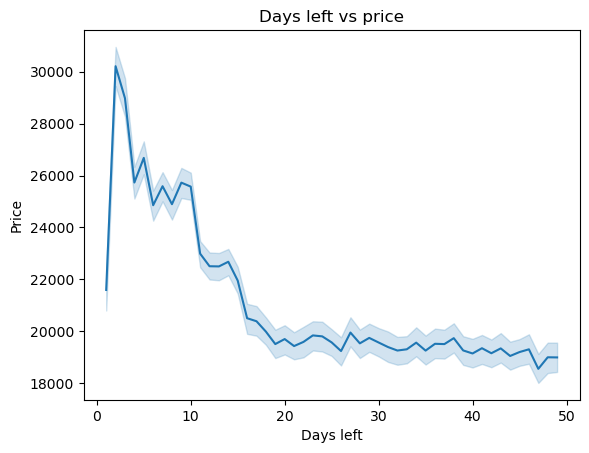

In [11]:
sns.lineplot(x = df['days_left'], y = df['price'])
plt.xlabel("Days left")
plt.ylabel("Price")
plt.title("Days left vs price")
plt.show()

*Inferences*

Price of the ticket increases as the days left for departure decreases

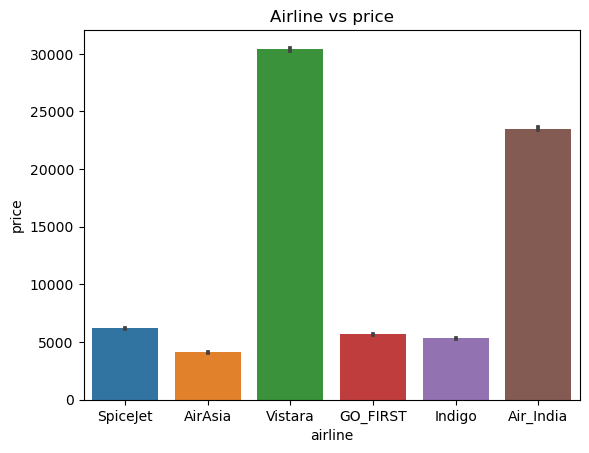

In [12]:
sns.barplot(x = df['airline'],y = df['price'])
plt.title("Airline vs price")
plt.show()

*Inferences*

* Price range of all the fights
* Vistara & Air_India having the price very high comapred to other airlines

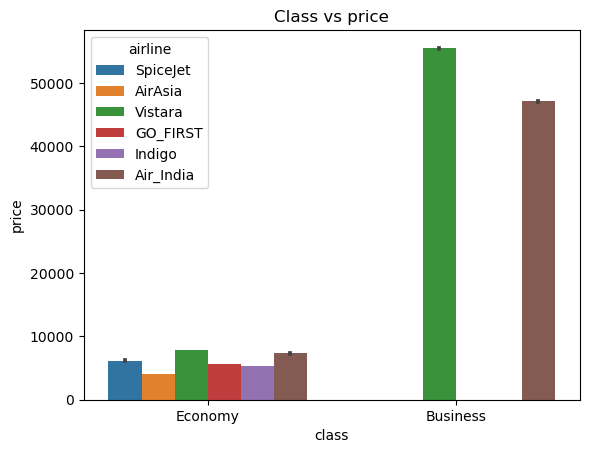

In [13]:
sns.barplot(x = df['class'], y = df['price'],hue = df['airline'])
plt.title("Class vs price")
plt.show()

*Inferences*

* Price range of all the flights of Economy and Business

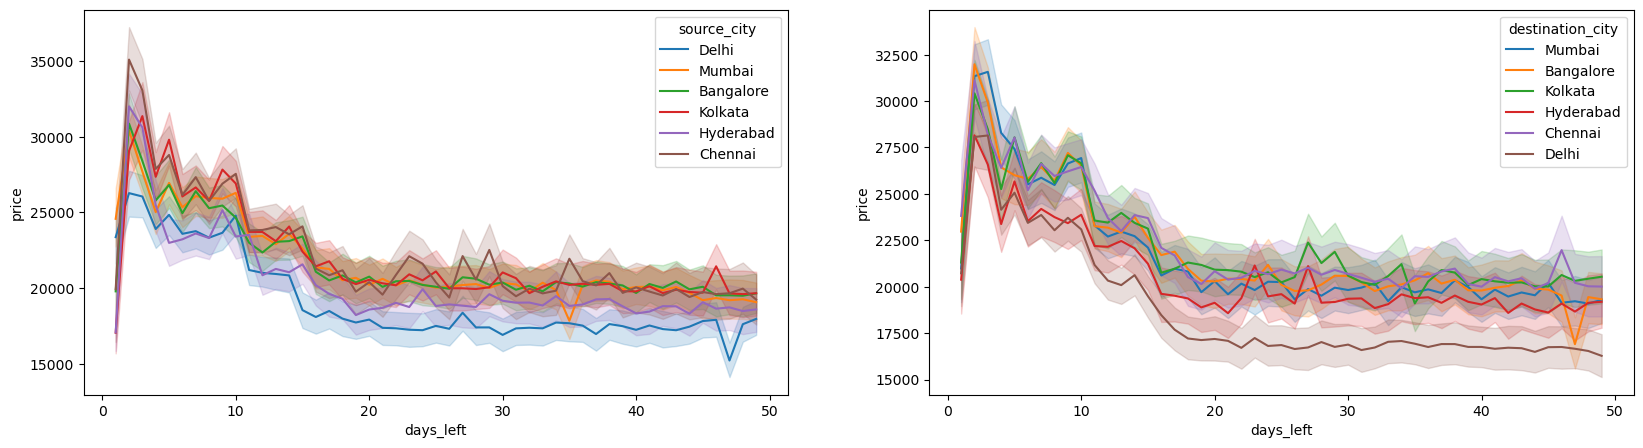

In [14]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.lineplot(data = df,x = 'days_left', y = 'price', hue = 'source_city', ax =ax[0])
sns.lineplot(data = df,x = 'days_left', y = 'price', hue = 'destination_city',ax = ax[1])
plt.show()

*Inferences*

Range of price of flights with source and destination city according to the days left

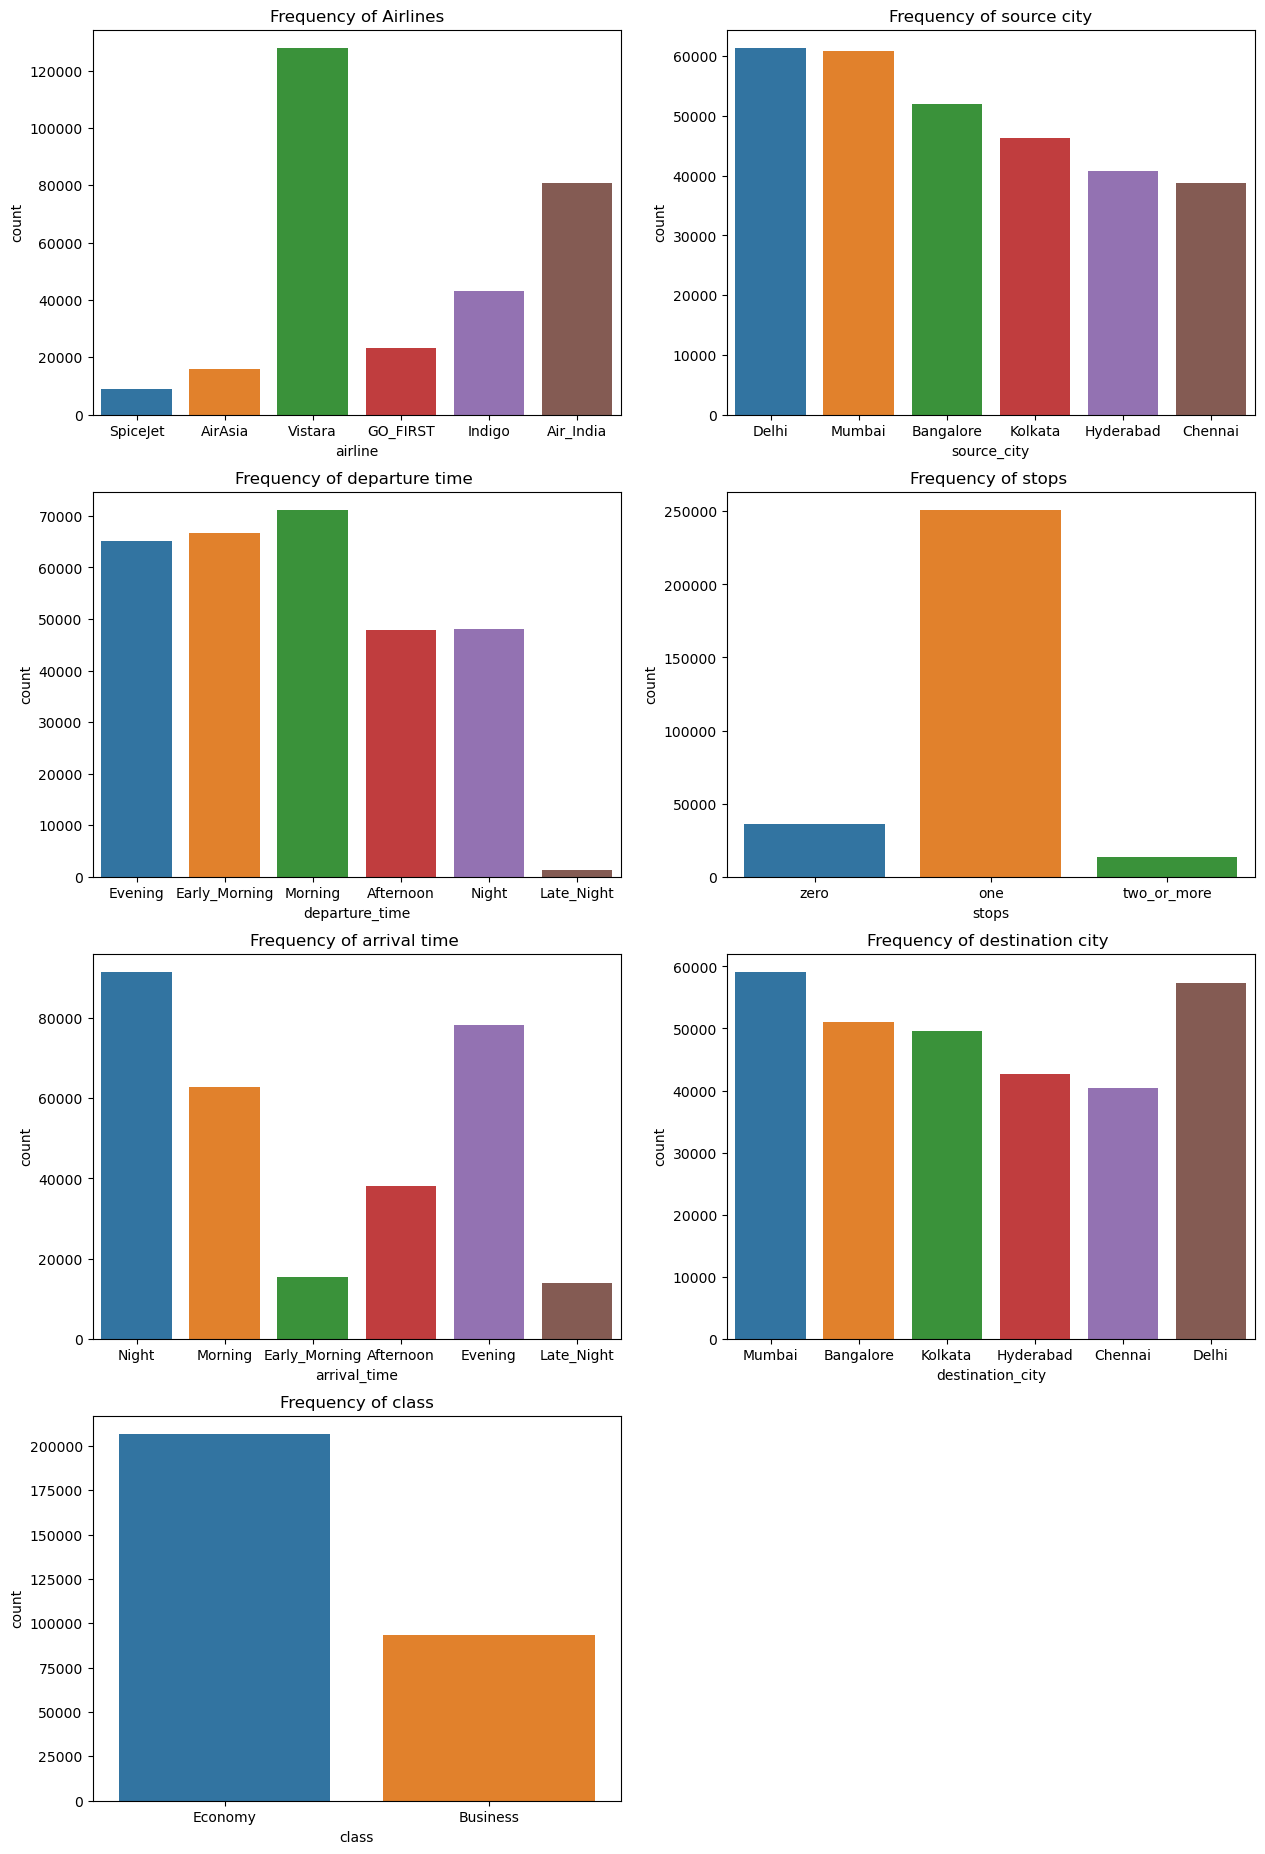

In [15]:
#visualization of categorical features with countplot
plt.figure(figsize = (15,23))
plt.subplot(4,2,1)
sns.countplot( x = df['airline'],data =df)
plt.title("Frequency of Airlines")

plt.subplot(4,2,2)
sns.countplot(x = df['source_city'],data =df)
plt.title("Frequency of source city")

plt.subplot(4,2,3)
sns.countplot(x = df['departure_time'],data =df)
plt.title("Frequency of departure time ")

plt.subplot(4,2,4)
sns.countplot(x = df['stops'],data =df)
plt.title("Frequency of stops ")

plt.subplot(4,2,5)
sns.countplot(x = df['arrival_time'],data =df)
plt.title("Frequency of arrival time ")

plt.subplot(4,2,6)
sns.countplot(x = df['destination_city'],data =df)
plt.title("Frequency of destination city ")

plt.subplot(4,2,7)
sns.countplot(x = df['class'],data =df)
plt.title("Frequency of class")
plt.show()

In [16]:
df.drop(columns = 'flight',inplace =True)

In [17]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

# Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['airline'] = le.fit_transform(df['airline'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['stops'] = le.fit_transform(df['stops'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] =le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   source_city       300153 non-null  int32  
 2   departure_time    300153 non-null  int32  
 3   stops             300153 non-null  int32  
 4   arrival_time      300153 non-null  int32  
 5   destination_city  300153 non-null  int32  
 6   class             300153 non-null  int32  
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2)
memory usage: 14.9 MB


# Feature selection

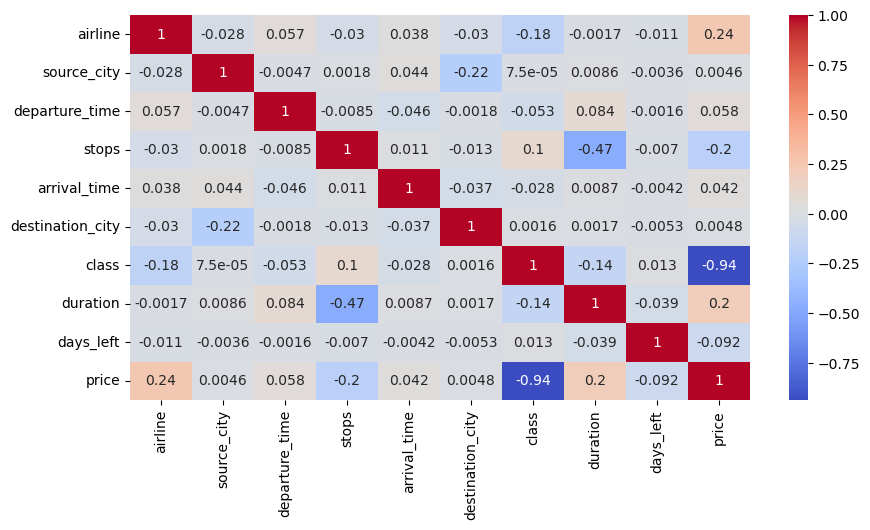

In [19]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if((df[col].dtype != object) & (col != 'price')):
        col_list.append(col)
        
X = df[col_list]
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i)
              for i in range(len(X.columns))]
print(vif)

           features       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


# Linear Regression

In [21]:
X = df.drop(columns=["price"])
y = df["price"]

In [22]:
X.shape

(300153, 9)

In [23]:
y.shape

(300153,)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (240122, 9)
X_test shape: (60031, 9)
y_train shape: (240122,)
y_test shape: (60031,)


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_test)

C:\Users\Sunny\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [28]:
difference = pd.DataFrame(np.c_[y_test,y_pred],columns = ["Actual_value","Predicted_value"])
difference

,Actual_value,Predicted_value
0,7366.0,-54264.328393
1,64831.0,-34945.501240
2,6195.0,-54407.869295
3,60160.0,16574.697019
4,6578.0,-25419.040915
...,...,...
60026,5026.0,-35545.675202
60027,3001.0,-45891.000047
60028,6734.0,-36559.447406
60029,5082.0,-66596.710139


In [29]:
from sklearn.metrics import *

In [30]:
print("R2_score:",r2_score(y_test,y_pred))
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))
print("Mean absolute percentage error:",mean_absolute_percentage_error(y_test,y_pred))
print("Mean squared error:",mean_squared_error(y_test,y_pred))
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2_score: -4.286970995454434
Mean absolute error: 45532.27312091924
Mean absolute percentage error: 6.55220951624585
Mean squared error: 2725339829.029537
Root Mean squared error: 52204.78741484862


C:\Users\Sunny\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Sunny\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


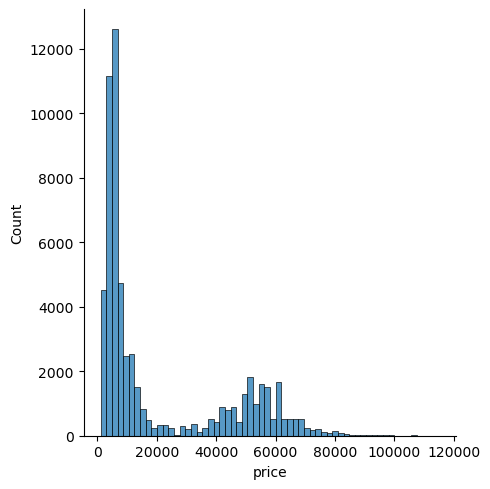

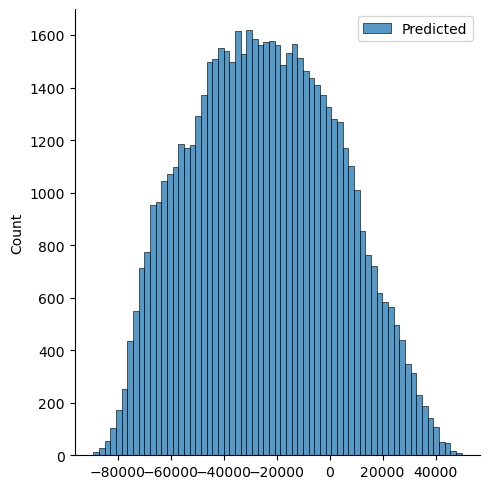

In [31]:
sns.displot(y_test,label = "Actual")
sns.displot(y_pred,label = "Predicted")
plt.legend()
plt.show()

# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [33]:
y_pred = dt.predict(X_test)

In [34]:
difference = pd.DataFrame(np.c_[y_test,y_pred],columns = ["Actual_value","Predicted_value"])
difference

,Actual_value,Predicted_value
0,7366.0,7366.0
1,64831.0,72783.0
2,6195.0,6195.0
3,60160.0,60160.0
4,6578.0,6578.0
...,...,...
60026,5026.0,5301.0
60027,3001.0,3001.0
60028,6734.0,6314.0
60029,5082.0,2815.0


In [35]:
print("R2_score:",r2_score(y_test,y_pred))
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))
print("Mean absolute percentage error:",mean_absolute_percentage_error(y_test,y_pred))
print("Mean squared error:",mean_squared_error(y_test,y_pred))
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2_score: 0.9756376326259871
Mean absolute error: 1173.5860000111054
Mean absolute percentage error: 0.07380909492701149
Mean squared error: 12558368.523476297
Root Mean squared error: 3543.7788479921114


C:\Users\Sunny\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Sunny\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


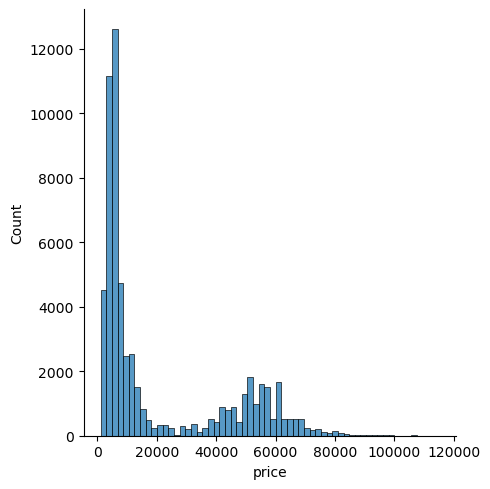

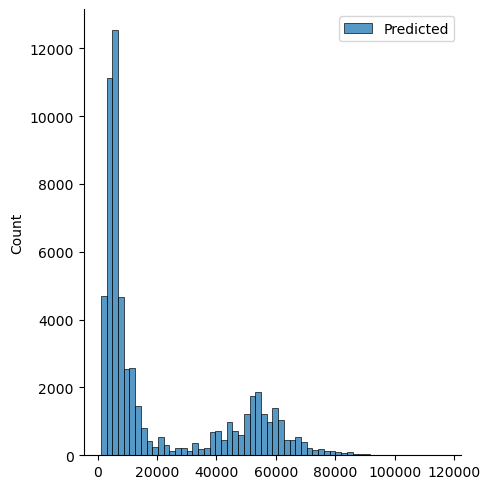

In [36]:
sns.displot(y_test,label = "Actual")
sns.displot(y_pred,label = "Predicted")
plt.legend()
plt.show()

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [40]:
y_pred = rf.predict(X_test)

In [41]:
difference = pd.DataFrame(np.c_[y_test,y_pred],columns = ["Actual_value","Predicted_value"])
difference

,Actual_value,Predicted_value
0,7366.0,6626.15
1,64831.0,70650.30
2,6195.0,6197.63
3,60160.0,60314.58
4,6578.0,6535.66
...,...,...
60026,5026.0,5232.70
60027,3001.0,2999.96
60028,6734.0,6468.71
60029,5082.0,3709.40


In [42]:
print("R2_score:",r2_score(y_test,y_pred))
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))
print("Mean absolute percentage error:",mean_absolute_percentage_error(y_test,y_pred))
print("Mean squared error:",mean_squared_error(y_test,y_pred))
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2_score: 0.9849005666687479
Mean absolute error: 1090.6932743748596
Mean absolute percentage error: 0.07046897524167016
Mean squared error: 7783490.223195453
Root Mean squared error: 2789.8907188625603


C:\Users\Sunny\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Sunny\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


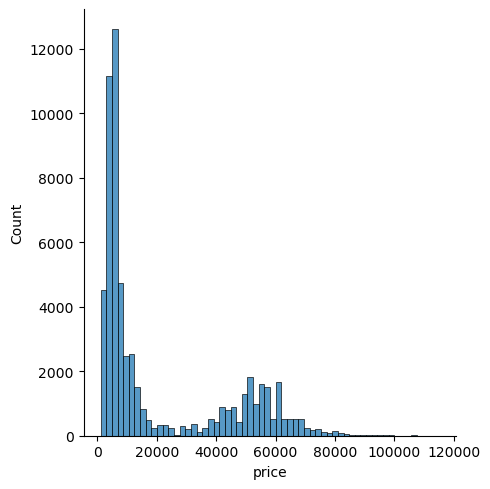

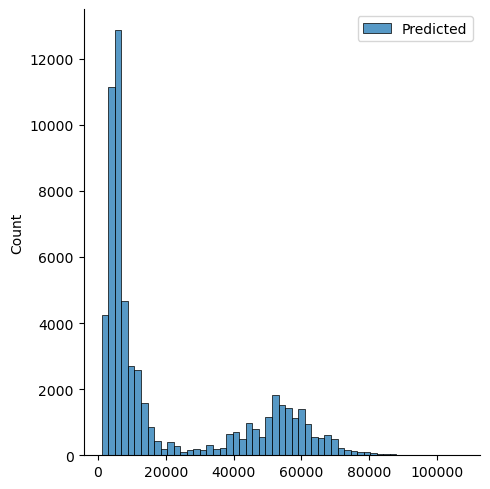

In [43]:
sns.displot(y_test,label = "Actual")
sns.displot(y_pred,label = "Predicted")
plt.legend()
plt.show()